In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

Problem statement <br>
Come up with a pricing model that can effectively predict the price of used cars and <br>
can help the business in devising profitable strategies using differential pricing <br>

Objective <br>

Explore and visualize the dataset <br>
Build a linear regression model to predict the prices of used cars <br>
Generate a set of insights and recommendations that will help the business

Target Variable = Price

# Importing the dataset and viewing a random sample of 10 rows

In [2]:
df = pd.read_csv("C:\\Users\\KXS26XY\\OneDrive - The Home Depot\\Desktop\\Data Science and Business Analytics\\used_cars_data.csv")
np.random.seed(1)
df.sample(n = 10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# Number of rows and columns in the dataset
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset')

There are 7253 rows and 14 columns in this dataset


In [5]:
# What the different columns are and what their datatypes are

df.info()
# Year needs to be converted to datetime
# Only 1006 non-null entries in New_Price column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [6]:
# Statistical summary of the numeric columns in the dataset

df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
# Columns having null values in the dataset

df.isnull().sum().sort_values(ascending = False)
# New_Price is having a lot of null values
# Price also has 1234 null values but doesn't matter since it is the dependent variable

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [8]:
# Looking at value counts for non-numeric features

non_num_columns = df.columns[df.dtypes == 'object']
print(non_num_columns)
# print(type(non_num_columns))

value_counts = [df[n].value_counts() for n in non_num_columns]

print(value_counts)

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')
[Mahindra XUV500 W8 2WD                             55
Maruti Swift VDI                                   49
Maruti Swift Dzire VDI                             42
Honda City 1.5 S MT                                39
Maruti Swift VDI BSIV                              37
                                                   ..
Fiat Avventura Urban Cross 1.3 Multijet Emotion     1
Toyota Prius 2009-2016 Z4                           1
Hyundai Santro GS                                   1
Tata Safari Storme 2012-2015 EX                     1
Honda CR-V 2.4L 4WD AT AVN                          1
Name: Name, Length: 2041, dtype: int64, Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: i

Before processing columns, I am peforming univariate and bivariate analyses to understand the correlation <br>
between all columns and the dependent column (Price)

# Univariate and Bivariate Analyses

# Performing Univariate Analyses on the numeric columns

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


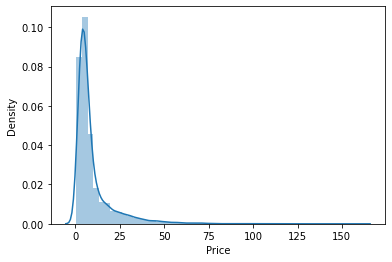

In [9]:
sns.distplot(df['Price']);

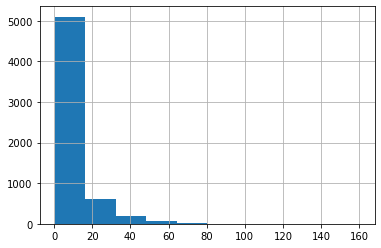

In [10]:
df['Price'].hist(bins = 10);

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


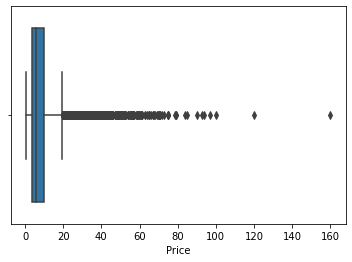

In [11]:
sns.boxplot(df['Price']);
# Highly skewed data with a few outliers

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


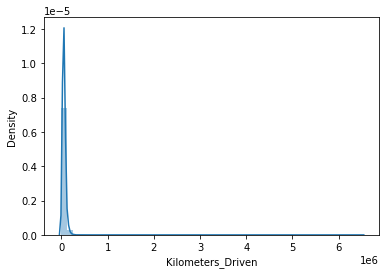

In [12]:
sns.distplot(df['Kilometers_Driven']);

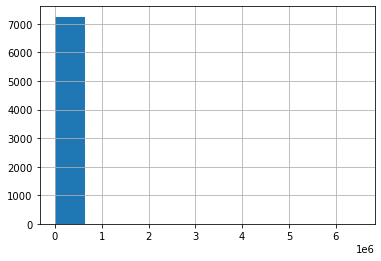

In [13]:
df['Kilometers_Driven'].hist(bins = 10);

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


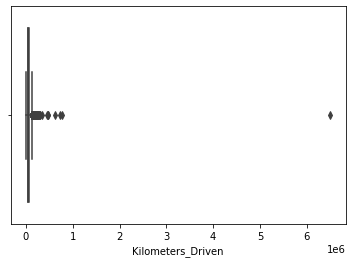

In [14]:
sns.boxplot(df['Kilometers_Driven']);
# Highly skewed data with one clear outlier

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


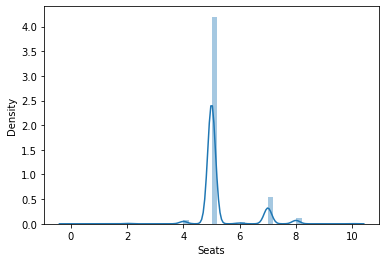

In [15]:
sns.distplot(df['Seats']);

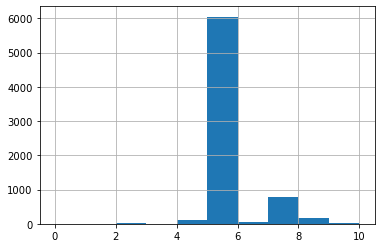

In [16]:
df['Seats'].hist(bins = 10);

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


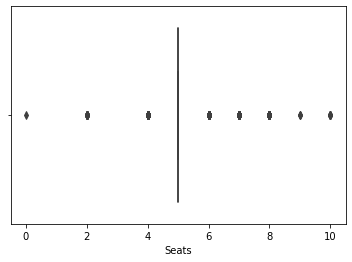

In [17]:
sns.boxplot(df['Seats']);
# not much of a distribution, data seems highly skewed

# Performing Univariate Analyses on the categorical columns

In [18]:
df['Price'].groupby(df['Location']).mean().sort_values(ascending = False)
# Average price of used cars sorted by order of most expensive to least expensive location

Location
Coimbatore    15.078223
Bangalore     13.328631
Kochi         11.179186
Hyderabad      9.776550
Delhi          9.707726
Mumbai         9.429329
Ahmedabad      8.457321
Chennai        7.753623
Pune           6.726254
Jaipur         5.809225
Kolkata        5.661215
Name: Price, dtype: float64

In [19]:
df['Price'].groupby(df['Transmission']).mean().sort_values(ascending = False)
# Average price of automatic transmission is higher than that of manual

Transmission
Automatic    19.843971
Manual        5.332703
Name: Price, dtype: float64

In [20]:
df['Price'].groupby(df['Fuel_Type']).mean().sort_values(ascending = False)
# Electric and Diesel cars are more expensive than other fuel types on average

Fuel_Type
Electric    12.875000
Diesel      12.840605
Petrol       5.701100
CNG          3.516786
LPG          2.487000
Name: Price, dtype: float64

In [21]:
df['Price'].groupby(df['Owner_Type']).mean().sort_values(ascending = False)
# Cars that have been owned only by one party are more expensive on average

Owner_Type
First             9.962445
Second            7.599886
Third             5.007257
Fourth & Above    3.280000
Name: Price, dtype: float64

In [22]:
df['S.No.'].groupby(df['Location']).count().sort_values(ascending = False)
# Most cars available in Mumbai

Location
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: S.No., dtype: int64

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


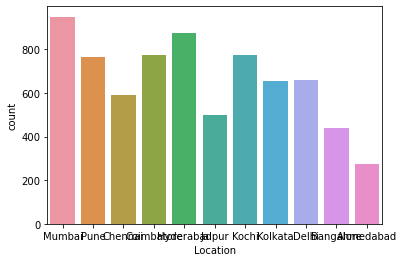

In [23]:
sns.countplot(df['Location']);

In [24]:
df['S.No.'].groupby(df['Transmission']).count().sort_values(ascending = False)
# 71% of available cars are manual

Transmission
Manual       5204
Automatic    2049
Name: S.No., dtype: int64

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


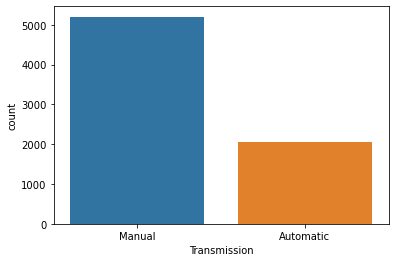

In [25]:
sns.countplot(df['Transmission']);


In [26]:
df['S.No.'].groupby(df['Year']).count().sort_values(ascending = False)


Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: S.No., dtype: int64

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


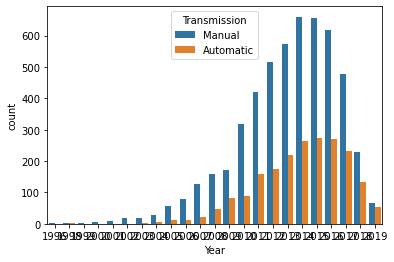

In [27]:
sns.countplot(df['Year'], hue=df['Transmission']);

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


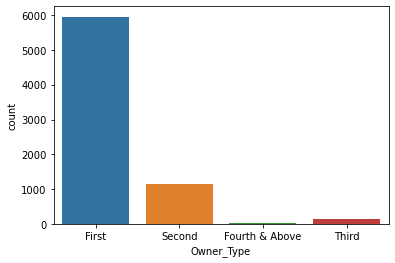

In [28]:
sns.countplot(df['Owner_Type']);

# Most used cars in the market have only had one owner

# Performing Bivariate Analyses to see if there is correlation between any two features 

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


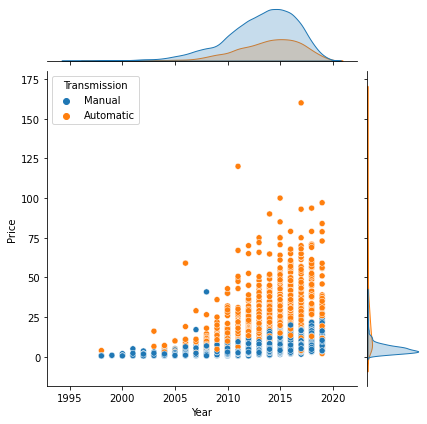

In [29]:
sns.jointplot(df['Year'], df['Price'], hue=df['Transmission']);


C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


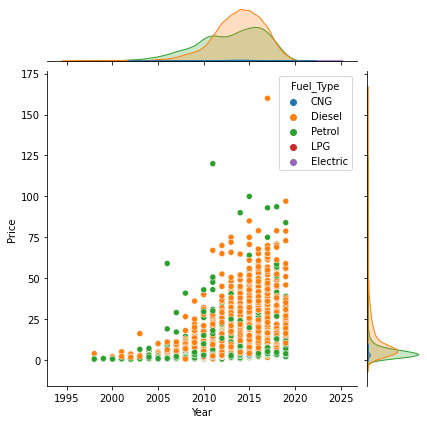

In [30]:
sns.jointplot(df['Year'], df['Price'], hue=df['Fuel_Type']);

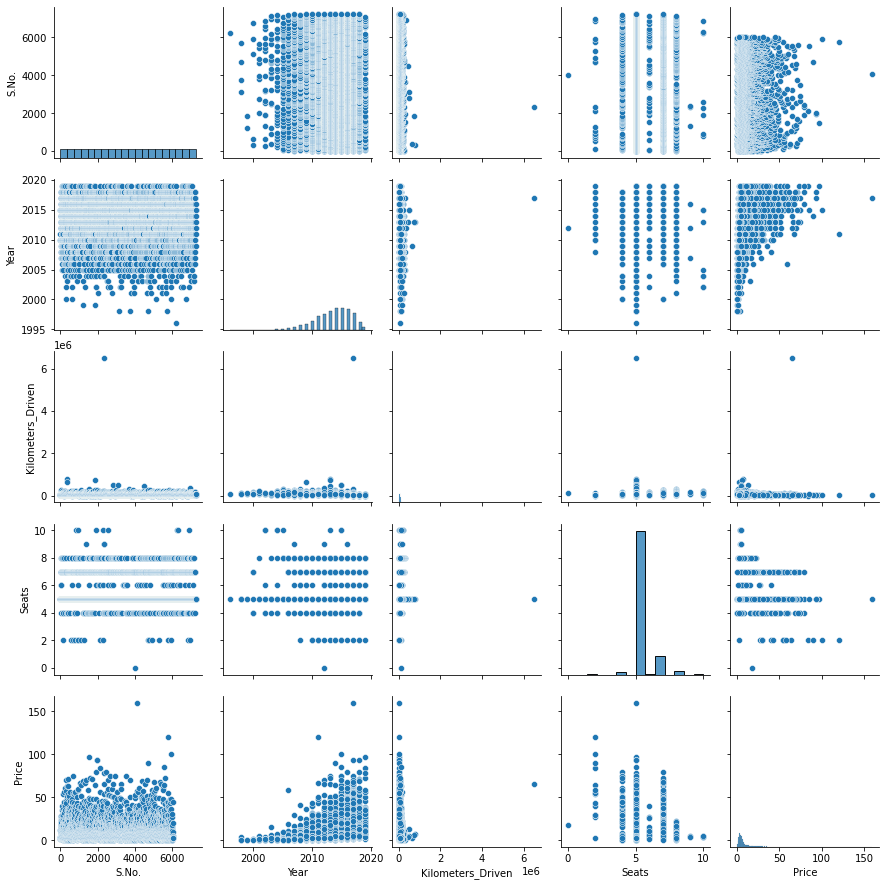

In [31]:
sns.pairplot(df);


In [32]:
# calculating covariance

df.cov()

,S.No.,Year,Kilometers_Driven,Seats,Price
S.No.,4.384438e+06,37.979730,-1.360626e+06,-11.425092,-394.158460
Year,3.797973e+01,10.591255,-5.161682e+04,0.021573,11.169366
Kilometers_Driven,-1.360626e+06,-51616.822165,7.128040e+09,6201.221577,-11735.383472
Seats,-1.142509e+01,0.021573,6.201222e+03,0.658791,0.473281
Price,-3.941585e+02,11.169366,-1.173538e+04,0.473281,125.169489


In [33]:
# calculating correlation

df.corr()
# looks like there is some correlation between year and price- higher the year, higher the price
# Rest of the correlation values are very low

,S.No.,Year,Kilometers_Driven,Seats,Price
S.No.,1.000000,0.005573,-0.007697,-0.006720,-0.020275
Year,0.005573,1.000000,-0.187859,0.008216,0.305327
Kilometers_Driven,-0.007697,-0.187859,1.000000,0.090221,-0.011493
Seats,-0.006720,0.008216,0.090221,1.000000,0.052225
Price,-0.020275,0.305327,-0.011493,0.052225,1.000000


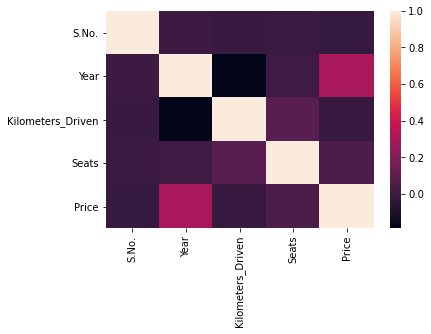

In [34]:
# heatmap to visualize correlation

sns.heatmap(df.corr());

No evidence of strong correlation between any of the columns with Price except Year (even this is not very strong)

# Data Preprocessing

# Fixing Mileage

In [35]:
df['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: Mileage, Length: 7253, dtype: object

In [36]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [37]:
float(df['Mileage'][0].split(' ')[0])

26.6

In [38]:
def mileage_to_num(mileage):
    """
    This fuction takes in a string as the mileage and converts it to a numerical value.
    If the input is not a string, it will return nan
    
    """
    
    if isinstance(mileage, str):
        return float(mileage.split(' ')[0])
    else:
        return np.nan

df['Mileage'] = df['Mileage'].apply(mileage_to_num)

df['Mileage'].dtypes


dtype('float64')

In [39]:
df['Mileage']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage, Length: 7253, dtype: float64

# Fixing Engine

In [40]:
df['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7253, dtype: object

In [41]:
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [42]:
def engine_to_num(engine):
    """
    This fuction takes in a string as the engine capacity and converts it to a numerical value.
    If the input is not a string, it will return nan
    
    """
    
    if isinstance(engine, str):
        return float(engine.split(' ')[0])
    else:
        return np.nan

df['Engine'] = df['Engine'].apply(engine_to_num)

df['Engine'].dtypes

dtype('float64')

In [43]:
df['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine, Length: 7253, dtype: float64

# Fixing Power

In [44]:
df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7253, dtype: object

In [45]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [46]:
def power_to_num(power):
    """
    This fuction takes in a string as the power and converts it to a numerical value.
    If the input is not a string, it will return nan
    
    """
    
    if isinstance(power, str):
        try:
            return float(power.split(' ')[0])
        except ValueError:
            return np.nan
    else:
        return np.nan

df['Power'] = df['Power'].apply(power_to_num)

df['Power'].dtypes

# Lines 8,13,14 are redundant

dtype('float64')

In [47]:
df['Power'].unique()


array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,     nan, 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

# Fixing New_Price

In [48]:
df['New_Price']

0             NaN
1             NaN
2       8.61 Lakh
3             NaN
4             NaN
          ...    
7248          NaN
7249          NaN
7250          NaN
7251          NaN
7252          NaN
Name: New_Price, Length: 7253, dtype: object

In [49]:
df['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

In [50]:
def new_price_to_num(new_price):
    """
    This fuction takes in a string as the power and converts it to a numerical value.
    If the input is not a string, it will return nan.
    If 'Lakh', as in
    If 'Cr', multiply by 100
    
    """
    
    if isinstance(new_price, str):
        value = float(new_price.split(' ')[0])
        
        if new_price.split(' ')[1] == 'Cr':
            return(value * 100)
        else:
            return value

    else:
        return np.nan
    
df['New_Price'] = df['New_Price'].apply(new_price_to_num)

df['New_Price'].dtypes

dtype('float64')

In [51]:
df['New_Price'].unique()

array([   nan,   8.61,  21.  ,  10.65,  32.01,  47.87,  10.57,  12.33,
        11.12,  23.64,  18.64,  19.34,  49.14,  11.81,  16.65,   6.67,
         6.45,   6.41,  27.  ,   5.13,  54.43,   9.51,   9.96,  14.44,
         4.53,  95.04,  13.49, 128.  ,  60.88,   7.39,  69.47,   8.78,
        12.74,  10.52,  11.98,   8.54,  33.58,   9.12,   5.29,  44.28,
        20.74,  11.74,  25.52,  14.07,  95.13,   8.34,   8.85,  25.4 ,
        16.67,  79.43,   6.62, 104.  ,  58.67,  28.37,   4.48,  72.64,
        36.15,  44.59,  12.  ,  14.65,  53.72,  33.91,  12.51,   9.74,
        95.38,  60.59,  11.28,  11.48,  11.26,  43.65,  62.07,  86.97,
       100.  ,   4.74,  14.84,  49.49,  48.18,  12.34,  15.38,  19.21,
        22.95,  11.15,  10.32,  28.05,  59.77,  15.86,  19.43,  42.12,
        16.95,  15.45,   7.87,   4.7 ,  15.02,  12.56,  11.33,  26.45,
        10.34,   7.46,  11.85,  10.41,   5.57,  42.48,  16.04,   9.1 ,
         7.65,  13.74,   5.72,  21.33,  78.76,   4.29,  10.04,  11.67,
      

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


# Treating Missing Values

In [53]:
df.isnull().sum()

# Null Values in Mileage, Engine, Power, Seats
# Too many null values in New_Price -- will drop this column
# Generally preferred to drop the missing values in the target variable -- will drop these records

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [54]:
# Dropping the New_Price column
# Ideally, the New_Price will affect the Price (Depreciation), but since there are too many missing values, will drop

df.drop(['New_Price'], axis=1, inplace=True)

In [55]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [56]:
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
df['Mileage'].isnull().sum()

0

In [57]:
df['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine, Length: 7253, dtype: float64

In [58]:
df['Engine'].fillna(df['Engine'].median(), inplace=True)
df['Engine'].isnull().sum()

0

In [59]:
df['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
7248    103.60
7249    103.60
7250     63.10
7251    103.60
7252    170.00
Name: Power, Length: 7253, dtype: float64

In [60]:
df['Power'].fillna(df['Power'].median(), inplace=True)
df['Power'].isnull().sum()

0

In [61]:
df['Seats']

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
7248    5.0
7249    5.0
7250    5.0
7251    5.0
7252    5.0
Name: Seats, Length: 7253, dtype: float64

In [62]:
df['Seats'].fillna(df['Seats'].median(), inplace=True)
df['Seats'].isnull().sum()

0

In [63]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

In [64]:
# dropping nulls from target variable

df.dropna(axis = 0, inplace=True)

In [65]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [66]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [67]:
df.shape

(6019, 13)

In [69]:
df1 = df.copy()
df1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [78]:
df1['Make'] = df1['Name'].str.partition(' ')[0]

In [80]:
df1['Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [82]:
df1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [92]:
def make_to_country(make):
    """
    This function should take in the make of the car and provide the country
    
    """
    
    if make.strip() == 'Maruti':
        return 'India'
    elif make.strip() == 'Hyundai':
        return 'Korea'
    elif make.strip() == 'Honda':
        return 'Japan'
    elif make.strip() == 'Audi':
        return 'Germany'
    elif make.strip() == 'Nissan':
        return 'Japan'
    elif make.strip() == 'Toyota':
        return 'Japan'
    elif make.strip() == 'Volkswagen':
        return 'Germany'
    elif make.strip() == 'Tata':
        return 'India'
    elif make.strip() == 'Land':
        return 'USA'
    elif make.strip() == 'Mitsubishi':
        return 'Japan'
    elif make.strip() == 'Renault':
        return 'France'
    elif make.strip() == 'Mercedes-Benz':
        return 'Germany'
    elif make.strip() == 'BMW':
        return 'Germany'
    elif make.strip() == 'Mahindra':
        return 'India'
    elif make.strip() == 'Ford':
        return 'USA'
    elif make.strip() == 'Porsche':
        return 'France'
    elif make.strip() == 'Datsun':
        return 'Japan'
    elif make.strip() == 'Jaguar':
        return 'UK'
    elif make.strip() == 'Volvo':
        return 'Sweden'
    elif make.strip() == 'Chevrolet':
        return 'USA'
    elif make.strip() == 'Skoda':
        return 'Czechia'
    elif make.strip() == 'Mini':
        return 'Germany'
    elif make.strip() == 'Fiat':
        return 'Italy'
    elif make.strip() == 'Jeep':
        return 'USA'
    elif make.strip() == 'Smart':
        return 'USA'
    elif make.strip() == 'Ambassador':
        return 'India'
    elif make.strip() == 'Isuzu':
        return 'Japan'
    elif make.strip() == 'ISUZU':
        return 'Japan'
    elif make.strip() == 'Force':
        return 'India'
    elif make.strip() == 'Bentley':
        return 'UK'
    else:
        return 'Italy'


In [95]:
df1['Country'] = df1['Make'].apply(make_to_country)

In [106]:
df1.head()
df1.drop(['Name', 'S.No.'], axis=1, inplace = True)

# Encoding Categorical Columns

# Fuel Type

In [830]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [831]:
pd.get_dummies(df['Fuel_Type'], drop_first=True)

,Diesel,Electric,LPG,Petrol
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
6014,1,0,0,0
6015,1,0,0,0
6016,1,0,0,0
6017,0,0,0,1


In [832]:
df = pd.concat([df,pd.get_dummies(df['Fuel_Type'], prefix='Fuel_Type',drop_first=True)],axis=1).drop(['Fuel_Type'],axis=1)

In [833]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Manual,First,26.60,998.0,58.16,5.0,1.75,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Manual,First,19.67,1582.0,126.20,5.0,12.50,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Manual,First,18.20,1199.0,88.70,5.0,4.50,0,0,0,1
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Manual,First,20.77,1248.0,88.76,7.0,6.00,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,1,0,0,0


In [99]:
df1 = pd.concat([df1,pd.get_dummies(df1['Fuel_Type'], prefix='Fuel_Type',drop_first=True)],axis=1).drop(['Fuel_Type'],axis=1)

In [100]:
df1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make,Country,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,India,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Korea,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Japan,0,0,0,1
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,India,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,Germany,1,0,0,0


# Transmission

In [834]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [835]:
pd.get_dummies(df['Transmission'], drop_first=True)

,Manual
0,1
1,1
2,1
3,1
4,0
...,...
6014,1
6015,1
6016,1
6017,1


In [836]:
df = pd.concat([df,pd.get_dummies(df['Transmission'], prefix='Transmission',drop_first=True)],axis=1).drop(['Transmission'],axis=1)

In [837]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,First,26.60,998.0,58.16,5.0,1.75,0,0,0,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,1,0,0,0,1
2,2,Honda Jazz V,Chennai,2011,46000,First,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,1
3,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,1,0,0,0,1
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,1,0,0,0,0


In [101]:
df1 = pd.concat([df1,pd.get_dummies(df1['Transmission'], prefix='Transmission',drop_first=True)],axis=1).drop(['Transmission'],axis=1)

In [107]:
df1.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Make,Country,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Mumbai,2010,72000,26.60,998.0,58.16,5.0,1.75,Maruti,India,0,0,0,0,1,0,0,0
1,Pune,2015,41000,19.67,1582.0,126.20,5.0,12.50,Hyundai,Korea,1,0,0,0,1,0,0,0
2,Chennai,2011,46000,18.20,1199.0,88.70,5.0,4.50,Honda,Japan,0,0,0,1,1,0,0,0
3,Chennai,2012,87000,20.77,1248.0,88.76,7.0,6.00,Maruti,India,1,0,0,0,1,0,0,0
4,Coimbatore,2013,40670,15.20,1968.0,140.80,5.0,17.74,Audi,Germany,1,0,0,0,0,0,1,0


# Owner Type

In [838]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [839]:
pd.get_dummies(df['Owner_Type'], drop_first=True)

,Fourth & Above,Second,Third
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
6014,0,0,0
6015,0,0,0
6016,0,1,0
6017,0,0,0


In [840]:
df = pd.concat([df,pd.get_dummies(df['Owner_Type'], prefix='Owner_Type',drop_first=True)],axis=1).drop(['Owner_Type'],axis=1)

In [841]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,0,0,0,1,0


In [103]:
df1 = pd.concat([df1,pd.get_dummies(df1['Owner_Type'], prefix='Owner_Type',drop_first=True)],axis=1).drop(['Owner_Type'],axis=1)

In [108]:
df1.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Make,Country,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Mumbai,2010,72000,26.60,998.0,58.16,5.0,1.75,Maruti,India,0,0,0,0,1,0,0,0
1,Pune,2015,41000,19.67,1582.0,126.20,5.0,12.50,Hyundai,Korea,1,0,0,0,1,0,0,0
2,Chennai,2011,46000,18.20,1199.0,88.70,5.0,4.50,Honda,Japan,0,0,0,1,1,0,0,0
3,Chennai,2012,87000,20.77,1248.0,88.76,7.0,6.00,Maruti,India,1,0,0,0,1,0,0,0
4,Coimbatore,2013,40670,15.20,1968.0,140.80,5.0,17.74,Audi,Germany,1,0,0,0,0,0,1,0


# Location

In [842]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [843]:
pd.get_dummies(df['Location'], drop_first=True)

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0
6015,0,0,0,0,0,1,0,0,0,0
6016,0,0,0,0,0,1,0,0,0,0
6017,0,0,0,0,0,0,0,1,0,0


In [844]:
df = pd.concat([df,pd.get_dummies(df['Location'], prefix='Location',drop_first=True)],axis=1).drop(['Location'],axis=1)

In [845]:
df.head()

,S.No.,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5.0,1.75,0,...,0,0,0,0,0,0,0,0,1,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,...,0,0,0,0,0,0,0,0,0,1
2,2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,...,0,1,0,0,0,0,0,0,0,0
3,3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,...,0,1,0,0,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,...,0,0,1,0,0,0,0,0,0,0


In [109]:
df1 = pd.concat([df1,pd.get_dummies(df1['Location'], prefix='Location',drop_first=True)],axis=1).drop(['Location'],axis=1)

# Checking Correlation again to check what columns affect the Target Variable the most

<AxesSubplot:>

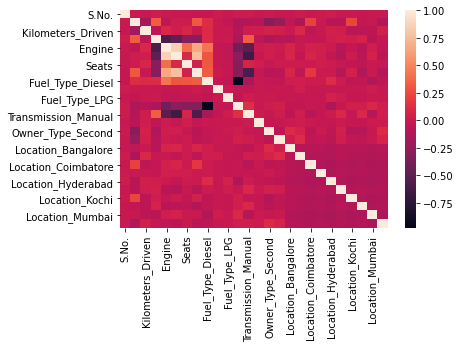

In [846]:
sns.heatmap(df.corr())

In [848]:
df.corr()['Price'].sort_values(ascending = False)

Price                        1.000000
Power                        0.770052
Engine                       0.657347
Fuel_Type_Diesel             0.320645
Year                         0.305327
Location_Coimbatore          0.172026
Location_Bangalore           0.086526
Location_Kochi               0.052911
Seats                        0.052811
Location_Hyderabad           0.009958
Location_Delhi               0.006496
Fuel_Type_Electric           0.005534
Location_Mumbai             -0.001742
Kilometers_Driven           -0.011493
S.No.                       -0.020275
Owner_Type_Fourth & Above   -0.021445
Fuel_Type_LPG               -0.025499
Location_Chennai            -0.046130
Owner_Type_Third            -0.055297
Owner_Type_Second           -0.073552
Location_Pune               -0.083550
Location_Jaipur             -0.089049
Location_Kolkata            -0.106606
Mileage                     -0.306588
Fuel_Type_Petrol            -0.309363
Transmission_Manual         -0.586025
Name: Price,

In [849]:
df.drop(['Name'], axis=1, inplace=True)

In [851]:
df.drop(['S.No.'], axis=1, inplace=True)

In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   int64  
 1   Kilometers_Driven          6019 non-null   int64  
 2   Mileage                    6019 non-null   float64
 3   Engine                     6019 non-null   float64
 4   Power                      6019 non-null   float64
 5   Seats                      6019 non-null   float64
 6   Price                      6019 non-null   float64
 7   Fuel_Type_Diesel           6019 non-null   uint8  
 8   Fuel_Type_Electric         6019 non-null   uint8  
 9   Fuel_Type_LPG              6019 non-null   uint8  
 10  Fuel_Type_Petrol           6019 non-null   uint8  
 11  Transmission_Manual        6019 non-null   uint8  
 12  Owner_Type_Fourth & Above  6019 non-null   uint8  
 13  Owner_Type_Second          6019 non-null   uint8

# Outlier Detection

In [853]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [854]:
numeric_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']
# print(numeric_columns)

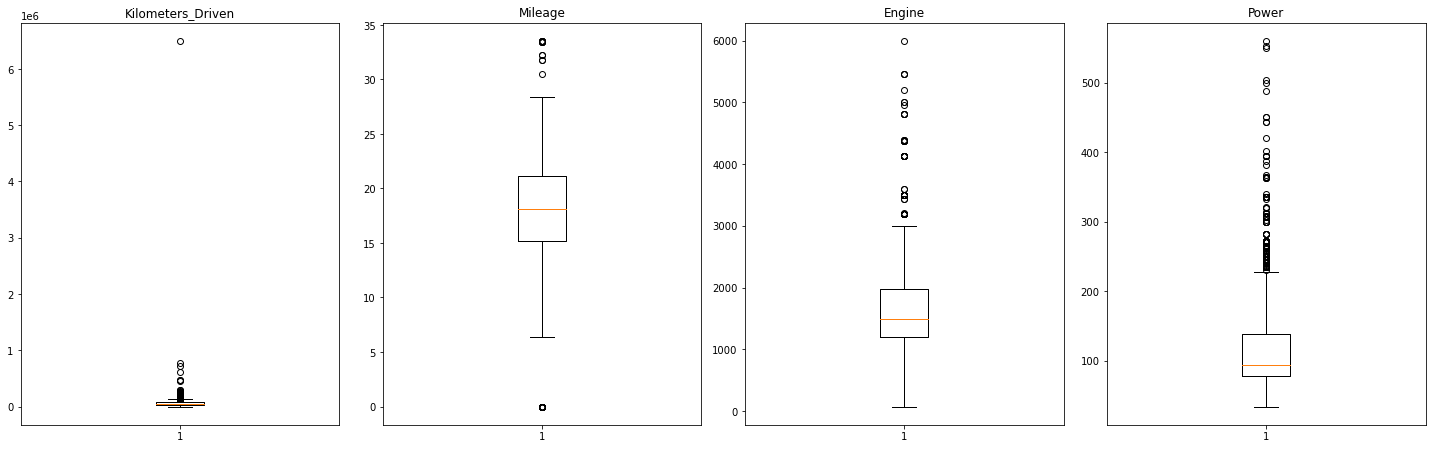

In [855]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Outlier Treatment

In [857]:
data_continous = df[['Kilometers_Driven','Mileage','Engine','Power']]

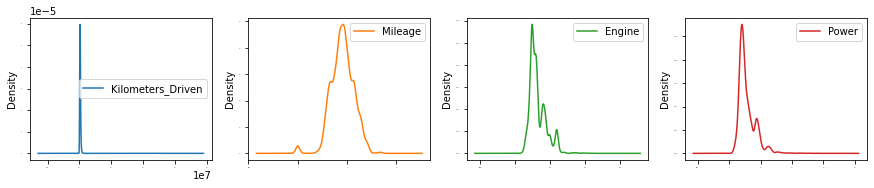

In [858]:
#Density Plot
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

In [859]:
#Remove Outliers from  'Kilometers_Driven','Power','Engine','Mileage'
Q1 = data_continous.quantile(0.25)
Q2 = data_continous.quantile(0.5)
Q3 = data_continous.quantile(0.75)

IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3+(1.5*IQR)

print("IQR : ",IQR)
print("")
print("Min : ",Min)
print("")
print("Q1 : ",Q1)
print("")
print("Q2 : ",Q2)
print("")
print("Q3 : ",Q3)
print("")
print("Max : ",Max)

IQR :  Kilometers_Driven    39000.00
Mileage                  5.93
Engine                 771.00
Power                   60.03
dtype: float64

Min :  Kilometers_Driven   -24500.000
Mileage                  6.275
Engine                  41.500
Power                  -12.045
dtype: float64

Q1 :  Kilometers_Driven    34000.00
Mileage                 15.17
Engine                1198.00
Power                   78.00
Name: 0.25, dtype: float64

Q2 :  Kilometers_Driven    53000.00
Mileage                 18.16
Engine                1493.00
Power                   94.00
Name: 0.5, dtype: float64

Q3 :  Kilometers_Driven    73000.00
Mileage                 21.10
Engine                1969.00
Power                  138.03
Name: 0.75, dtype: float64

Max :  Kilometers_Driven    131500.000
Mileage                  29.995
Engine                 3125.500
Power                   228.075
dtype: float64


In [860]:
#Check shape before removal of outliers
df.shape

(6019, 25)

In [861]:
#Remove Outliers
df = df[~((df[['Kilometers_Driven','Power','Engine','Mileage']] < Min) | (df[['Kilometers_Driven','Power','Engine','Mileage']] > Max)).any(axis=1)]

In [862]:
#Check shape after removal of outliers
df.shape

(5489, 25)

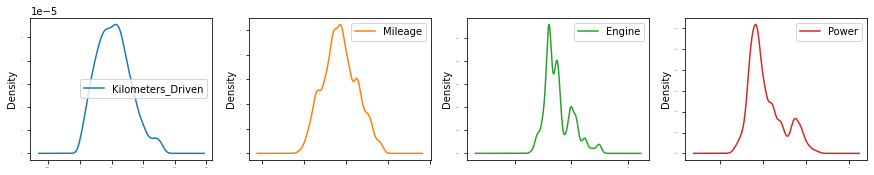

In [864]:
#Density Plot post outlier removal
data_continous = df[['Kilometers_Driven','Mileage','Engine','Power']]
data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

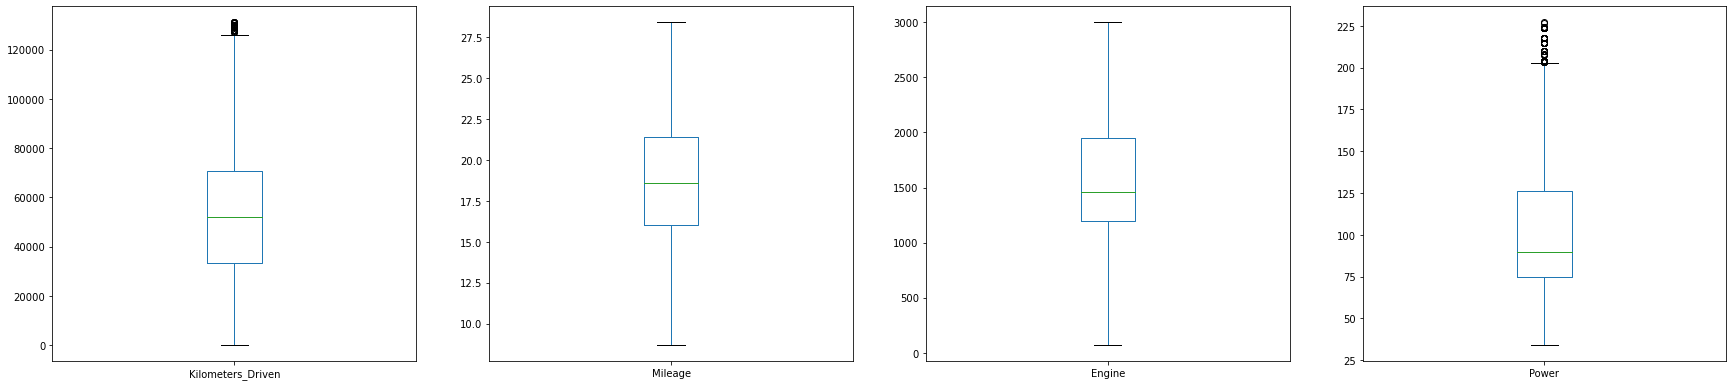

In [865]:
#Box_Plot post outlier removal
data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


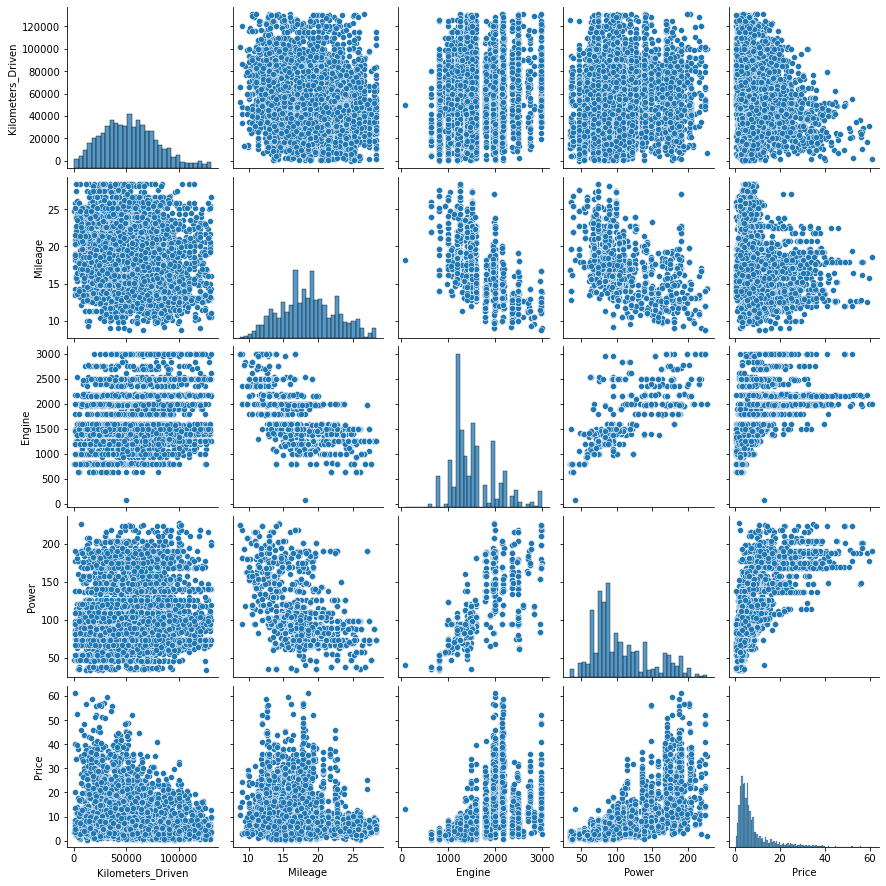

In [866]:
data_continous['Price']=df.Price
sns.pairplot(data_continous)
plt.show()

In [868]:
data_continous.corr()

,Kilometers_Driven,Mileage,Engine,Power,Price
Kilometers_Driven,1.000000,-0.144439,0.221600,0.062236,-0.180906
Mileage,-0.144439,1.000000,-0.615729,-0.529283,-0.270001
Engine,0.221600,-0.615729,1.000000,0.818537,0.579938
Power,0.062236,-0.529283,0.818537,1.000000,0.733512
Price,-0.180906,-0.270001,0.579938,0.733512,1.000000


<AxesSubplot:>

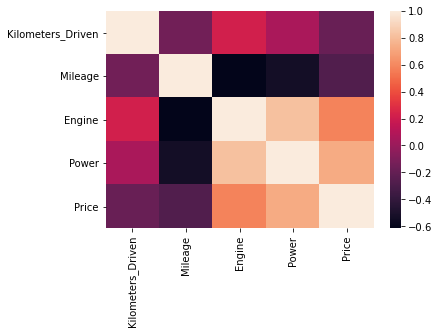

In [867]:
sns.heatmap(data_continous.corr())

# Variable Scaling and Feature Selection

# Scaling Power

In [869]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

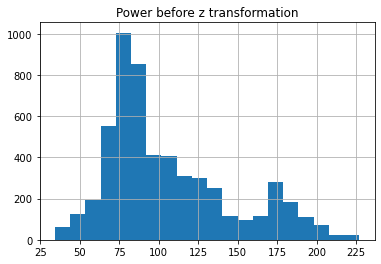

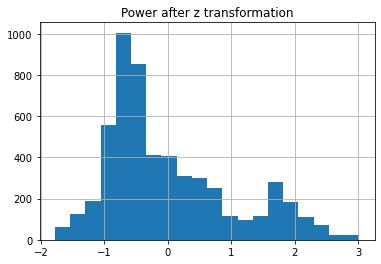

0      -1.183585
1       0.510676
2      -0.423110
3      -0.421616
4       0.874230
          ...   
6014   -0.789154
6015   -0.863857
6016    0.157083
6017   -0.960970
6018   -1.197530
Name: Power_z_std, Length: 5489, dtype: float64

In [870]:
std_scaler = StandardScaler()

df['Power'].hist(bins=20)
plt.title('Power before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']


df['Power_z_std'] = std_scaler.fit_transform(df[['Power']])
df['Power_z_std'].hist(bins=20)
plt.title('Power after z transformation')
plt.show()
# exact same shape since it's a linear transformation.

df['Power_z_std']

In [871]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Power_z_std
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,1,0,-1.183585
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,...,0,0,0,0,0,0,0,0,1,0.510676
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.423110
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,...,1,0,0,0,0,0,0,0,0,-0.421616
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,1,0,0,0,0,0,0,0,0.874230


# Scaling Mileage

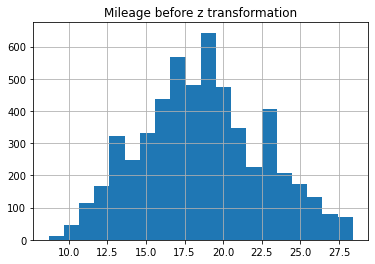

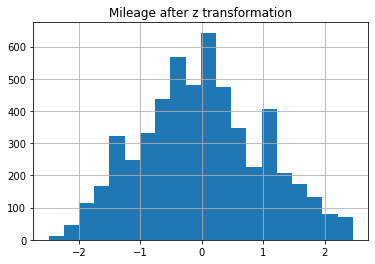

0       2.002818
1       0.261595
2      -0.107756
3       0.537979
4      -0.861532
          ...   
6014    2.455083
6015    1.450049
6016   -1.163042
6017    0.068125
6018    1.711358
Name: Mileage_z_std, Length: 5489, dtype: float64

In [872]:
df['Mileage'].hist(bins=20)
plt.title('Mileage before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']


df['Mileage_z_std'] = std_scaler.fit_transform(df[['Mileage']])
df['Mileage_z_std'].hist(bins=20)
plt.title('Mileage after z transformation')
plt.show()
# exact same shape since it's a linear transformation.

df['Mileage_z_std']

In [873]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Power_z_std,Mileage_z_std
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,1,0,-1.183585,2.002818
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,...,0,0,0,0,0,0,0,1,0.510676,0.261595
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,0,0,-0.423110,-0.107756
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,...,0,0,0,0,0,0,0,0,-0.421616,0.537979
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,1,0,0,0,0,0,0,0,0.874230,-0.861532


# Scaling Engine

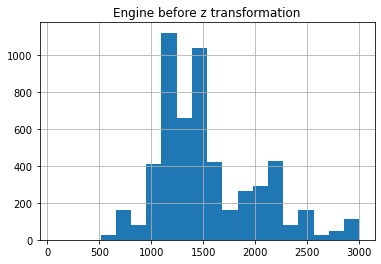

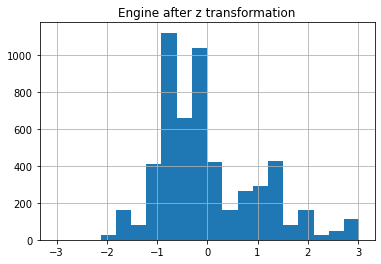

0      -1.117552
1       0.091575
2      -0.701397
3      -0.599946
4       0.890758
          ...   
6014   -0.599946
6015   -0.864960
6016    1.988082
6017   -1.117552
6018   -1.245918
Name: Engine_z_std, Length: 5489, dtype: float64

In [874]:
df['Engine'].hist(bins=20)
plt.title('Engine before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']


df['Engine_z_std'] = std_scaler.fit_transform(df[['Engine']])
df['Engine_z_std'].hist(bins=20)
plt.title('Engine after z transformation')
plt.show()
# exact same shape since it's a linear transformation.

df['Engine_z_std']

In [875]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Power_z_std,Mileage_z_std,Engine_z_std
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,1,0,-1.183585,2.002818,-1.117552
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,...,0,0,0,0,0,0,1,0.510676,0.261595,0.091575
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,0,-0.423110,-0.107756,-0.701397
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,...,0,0,0,0,0,0,0,-0.421616,0.537979,-0.599946
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,0,0,0,0,0,0,0.874230,-0.861532,0.890758


# Scaling Price

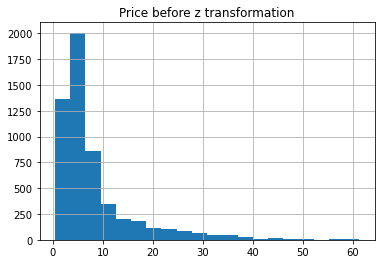

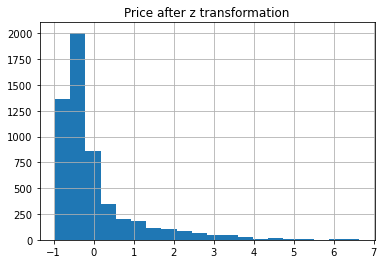

0      -0.801158
1       0.543156
2      -0.457263
3      -0.269685
4       1.198430
          ...   
6014   -0.426000
6015   -0.519790
6016   -0.657347
6017   -0.688610
6018   -0.707368
Name: Price_z_std, Length: 5489, dtype: float64

In [876]:
df['Price'].hist(bins=20)
plt.title('Price before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']


df['Price_z_std'] = std_scaler.fit_transform(df[['Price']])
df['Price_z_std'].hist(bins=20)
plt.title('Price after z transformation')
plt.show()
# exact same shape since it's a linear transformation.

df['Price_z_std']

In [877]:
df.drop(['Power'], axis=1, inplace=True)
# df.head()

In [878]:
df.drop(['Mileage'], axis=1, inplace=True)

In [879]:
df.drop(['Engine'], axis=1, inplace=True)

In [881]:
df.drop(['Price'], axis=1, inplace=True)

In [894]:
df.drop(['Fuel_Type_Petrol'], axis=1, inplace=True)

# Model building - Linear Regression

In [895]:
df.head()

,Year,Kilometers_Driven,Seats,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Power_z_std,Mileage_z_std,Engine_z_std,Price_z_std
0,2010,72000,5.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,-1.183585,2.002818,-1.117552,-0.801158
1,2015,41000,5.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0.510676,0.261595,0.091575,0.543156
2,2011,46000,5.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,-0.423110,-0.107756,-0.701397,-0.457263
3,2012,87000,7.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,-0.421616,0.537979,-0.599946,-0.269685
4,2013,40670,5.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.874230,-0.861532,0.890758,1.198430


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [897]:
# building out the linear model
# independent variables
X = df.drop(['Price_z_std'], axis = 1)

# dependent variable
y = df[['Price_z_std']]

print(X.head())
print(y.head())

   Year  Kilometers_Driven  Seats  Fuel_Type_Diesel  Fuel_Type_Electric  \
0  2010              72000    5.0                 0                   0   
1  2015              41000    5.0                 1                   0   
2  2011              46000    5.0                 0                   0   
3  2012              87000    7.0                 1                   0   
4  2013              40670    5.0                 1                   0   

   Fuel_Type_LPG  Transmission_Manual  Owner_Type_Fourth & Above  \
0              0                    1                          0   
1              0                    1                          0   
2              0                    1                          0   
3              0                    1                          0   
4              0                    0                          0   

   Owner_Type_Second  Owner_Type_Third  ...  Location_Delhi  \
0                  0                 0  ...               0   
1             

In [898]:
print(X.shape)
print(y.shape)

(5489, 23)
(5489, 1)


Splitting into Test and Train Datasets

In [899]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


Fit the Linear Model

In [900]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)


LinearRegression()

Coefficients and intercept of the model

In [901]:
# check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,0.079586
Kilometers_Driven,-0.000005
Seats,-0.061223
Fuel_Type_Diesel,0.419036
Fuel_Type_Electric,1.191542
Fuel_Type_LPG,0.401537
Transmission_Manual,-0.424059
Owner_Type_Fourth & Above,-0.249581
Owner_Type_Second,-0.056542
Owner_Type_Third,0.114925


In [902]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [903]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.352425,-37.580729,0.539976,0.719989


In [904]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.364676,-48.208409,0.532996,0.685448


In [905]:
# Let's build linear regression model using statsmodel
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_z_std   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     414.9
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:48:32   Log-Likelihood:                -3036.6
No. Observations:                3842   AIC:                             6121.
Df Residuals:                    3818   BIC:                             6271.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [906]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                        839380.722437
Year                              2.073686
Kilometers_Driven                 1.823271
Seats                             1.924831
Fuel_Type_Diesel                  2.563859
Fuel_Type_Electric                1.006411
Fuel_Type_LPG                     1.009320
Transmission_Manual               1.819894
Owner_Type_Fourth & Above         1.008007
Owner_Type_Second                 1.166603
Owner_Type_Third                  1.102097
Location_Bangalore                2.328861
Location_Chennai                  2.761069
Location_Coimbatore               3.333019
Location_Delhi                    3.117024
Location_Hyderabad                3.616669
Location_Jaipur                   2.614706
Location_Kochi                    3.519207
Location_Kolkata                  3.122395
Location_Mumbai                   3.899378
Location_Pune                     3.251667
Power_z_std                       4.907132
Mileage_z_std                     3.4362

In [111]:
df1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Make,Country,Fuel_Type_Diesel,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,26.60,998.0,58.16,5.0,1.75,Maruti,India,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,Hyundai,Korea,1,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,Honda,Japan,0,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,Maruti,India,1,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,Audi,Germany,1,...,0,0,1,0,0,0,0,0,0,0


In [112]:
df1 = pd.concat([df1,pd.get_dummies(df1['Country'], prefix='Country',drop_first=True)],axis=1).drop(['Country'],axis=1)

In [113]:
df1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Make,Fuel_Type_Diesel,Fuel_Type_Electric,...,Location_Pune,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_Korea,Country_Sweden,Country_UK,Country_USA
0,2010,72000,26.60,998.0,58.16,5.0,1.75,Maruti,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,Hyundai,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,Honda,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,Maruti,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,Audi,1,0,...,0,0,1,0,0,0,0,0,0,0


In [124]:
# building out the linear model
# independent variables
X = df1.drop(['Price'], axis = 1)

# dependent variable
y = df1[['Price']]

print(X.head())
print(y.head())

   Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Fuel_Type_Diesel  \
0  2010              72000    26.60   998.0   58.16    5.0                 0   
1  2015              41000    19.67  1582.0  126.20    5.0                 1   
2  2011              46000    18.20  1199.0   88.70    5.0                 0   
3  2012              87000    20.77  1248.0   88.76    7.0                 1   
4  2013              40670    15.20  1968.0  140.80    5.0                 1   

   Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  ...  Location_Pune  \
0                   0              0                 0  ...              0   
1                   0              0                 0  ...              1   
2                   0              0                 1  ...              0   
3                   0              0                 0  ...              0   
4                   0              0                 0  ...              0   

   Country_France  Country_Germany  Country_India 

In [125]:
print(X.shape)
print(y.shape)

(6019, 33)
(6019, 1)


In [126]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [127]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)


LinearRegression()

In [128]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,0.887368
Kilometers_Driven,-0.000026
Mileage,-0.177816
Engine,0.001399
Power,0.115188
Seats,-0.769149
Fuel_Type_Diesel,-0.789519
Fuel_Type_Electric,8.652303
Fuel_Type_LPG,0.421798
Fuel_Type_Petrol,-2.737815


In [129]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [130]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,3.556407,70.774289,6.122646,0.70683


In [131]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,3.450438,66.022423,7.032057,0.583596
